In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv(r'C:\Users\Dator\Desktop\All Data\amazon.csv',encoding='iso-8859-1',parse_dates=['date'])
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [15]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

### Display Top 5 Rows of The Dataset

In [16]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### Check Last 5 Rows

In [17]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Shape of Our Dataset (Number of Rows And Number of Columns)

In [18]:
data.shape

(6454, 5)

In [26]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 6454
Number of columns 5


### Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### Check For Duplicate Data and Drop Them

In [31]:
dup_data = data.duplicated().any()


In [32]:
print('Are there any duplicated values in the data',dup_data)

Are there any duplicated values in the data True


In [35]:
data = data.drop_duplicates()

In [38]:
data.shape

(6422, 5)

In [39]:
6454-6422

32

### Check Null Values In The Dataset

In [43]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### Overall Statistics About The Dataframe

In [45]:
data.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [47]:
data.describe(include = 'all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### Rename Month Names To English

In [48]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [49]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [50]:
data['month_new']=data['month'].map({'Janeiro':'jan', 'Fevereiro':'feb', 'Março':'march', 'Abril':'april', 
                                     'Maio':'may', 'Junho':'jun', 'Julho':'july',
                                    'Agosto':'august', 'Setembro':'sep', 'Outubro':'oct',
                                     'Novembro':'nov', 'Dezembro':'dec'})

In [51]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


### Total Number of Fires Registered

In [52]:
data.shape

(6422, 6)

###  Maximum Number of Forest Fires Were Reported (Month)

In [54]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [58]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<AxesSubplot:xlabel='month_new', ylabel='number'>

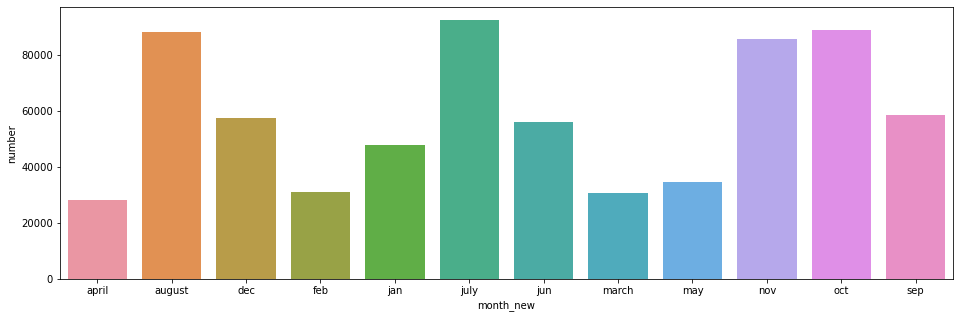

In [60]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new', y = 'number',data=data1)

###  Maximum Number of Forest Fires Was Reported (Year)

In [61]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

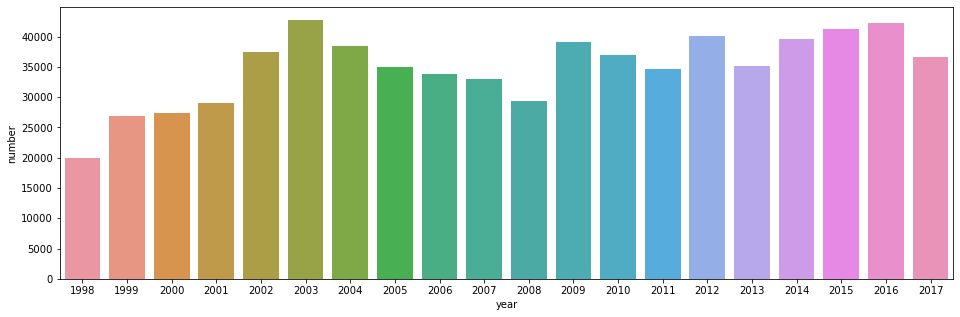

In [62]:
plt.figure(figsize=(16,5))
sns.barplot(x='year', y = 'number',data=data2)

### which state Maximum Number of Forest Fires Was Reported

In [63]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [64]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


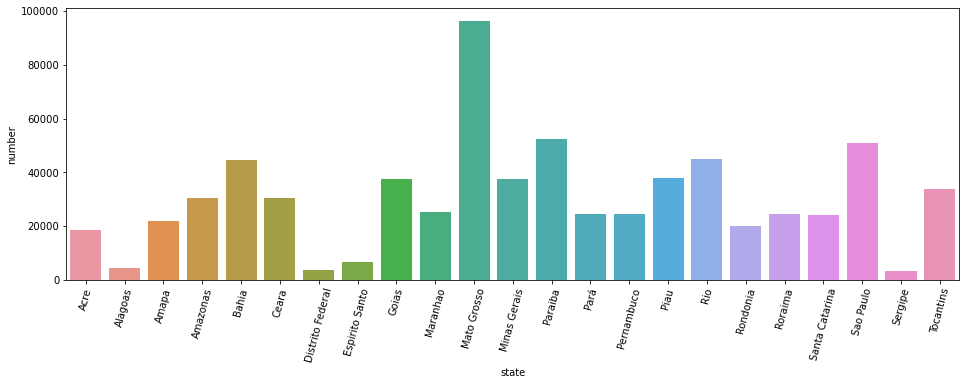

In [67]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y = 'number',data=data3)
plt.xticks(rotation = 75)
plt.show()

### Total Number of Fires Were Reported In Amazonas

In [68]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [71]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

### Total Number of Fires Were Reported In Amazonas (Year-Wise)


In [77]:
data4 =data[data['state']=='Amazonas']
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

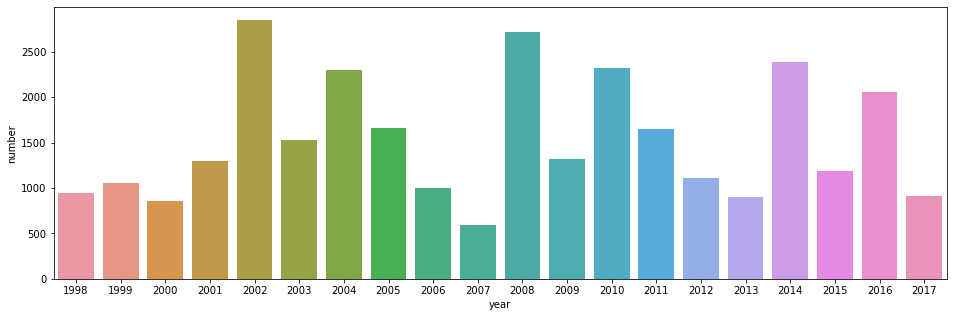

In [79]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number', data=data5)

### Total Number of Fires Were Reported In Amazonas Day-Wise)

In [80]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [83]:
data6 =data[data['state']=='Amazonas']
data7 = data6.groupby('date')['number'].sum().reset_index() # this for days
data7

,date,number
0,1998-01-01,946.000
1,1999-01-01,1061.000
2,2000-01-01,853.000
3,2001-01-01,1297.000
4,2002-01-01,2852.000
5,2003-01-01,1524.268
6,2004-01-01,2298.207
7,2005-01-01,1657.128
8,2006-01-01,997.640
9,2007-01-01,589.601


In [89]:
day = data6.groupby(data6['date'].dt.dayofweek).sum().number
import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [90]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

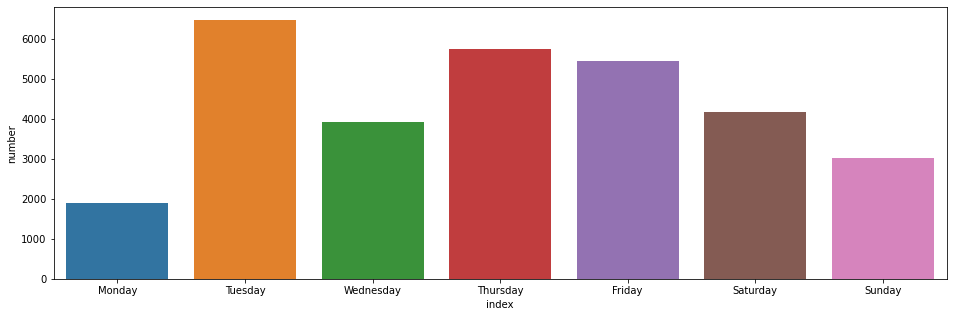

In [91]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number', data=day)

### Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [92]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [96]:
fire = data[data['year']== 2015].groupby('month_new')['number'].sum().reset_index()

In [97]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<AxesSubplot:xlabel='month_new', ylabel='number'>

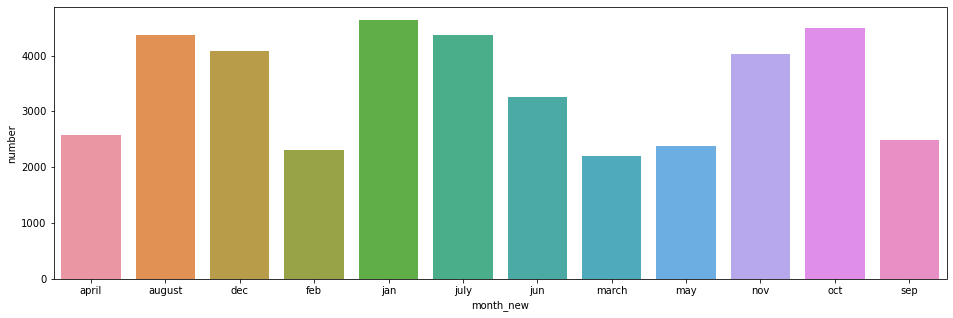

In [100]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new', y = 'number', data=fire)

### Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [101]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [107]:
data8= data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


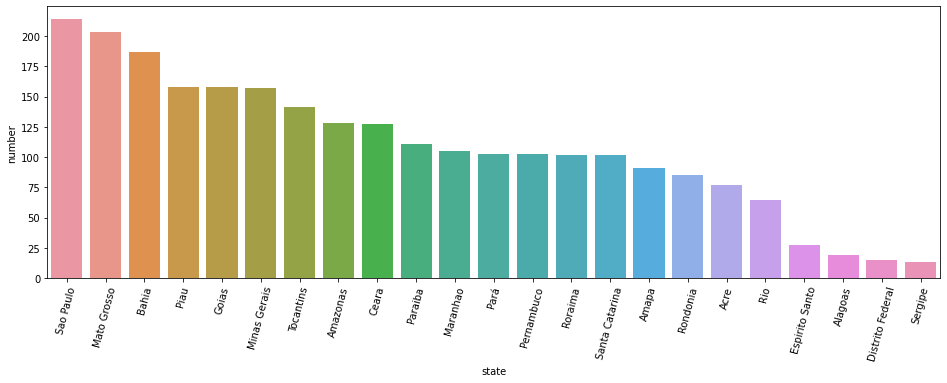

In [109]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y = 'number', data=data8)
plt.xticks(rotation=75)
plt.show()

### The State Names Where Fires Were Reported In 'dec' Month

In [110]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [115]:
data[data['month_new']== 'dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)